In [1]:
import seaborn as sns
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import six

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


%matplotlib inline

import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

import pybedtools

facet_kws = dict(col='phenotype', hue='modality', hue_order=modality_order, palette=modality_palette,
                 col_order=study.phenotype_order, size=2)


folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-23 11:15:53	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-02-23 11:15:53	Parsing datapackage to create a Study object
2016-02-23 11:16:25	Initializing Study
2016-02-23 11:16:25	Initializing Predictor configuration manager for Study
2016-02-23 11:16:25	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-23 11:16:25	Added ExtraTreesClassifier to default predictors
2016-02-23 11:16:25	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-23 11:16:25	Added ExtraTreesRegressor to default predictors
2016-02-23 11:16:25	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-23 11:16:25	Added GradientBoostingClassifier to default predictors
2016-02-23 11:16:25	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [3]:
study.supplemental.modalities_tidy.head()

,phenotype,event_id,modality
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal
3,MN,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal
4,MN,exon:chr10:103567487-103567658:-@exon:chr10:10...,included


In [4]:
figure_folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/sequence_conservation_features'
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/sequence_conservation_features': File exists


## GC Content

In [5]:
csv = 'gc_content.csv'
alternative_gc = pd.read_csv('{}/{}'.format(alternative_feature_folder, csv), index_col=0, squeeze=True, header=None)
alternative_gc.name = 'GC'
six.print_(alternative_gc.shape)
alternative_gc.head()

(43903,)


0
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-    48.571429
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-    40.000000
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-    37.254902
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-    37.254902
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-    44.444444
Name: GC, dtype: float64

In [6]:
modalities_gc = study.supplemental.modalities_tidy.join(alternative_gc, on='event_id')
modalities_gc.head()

,phenotype,event_id,modality,GC
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,50.214592
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,51.923077
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,65.753425
3,MN,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal,39.622642
4,MN,exon:chr10:103567487-103567658:-@exon:chr10:10...,included,41.414141


In [7]:
pd.options.display.max_colwidth = 100

In [8]:
modalities_gc.event_id[modalities_gc.GC.isnull()]

Series([], Name: event_id, dtype: object)

In [9]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

In [10]:
constitutive_gc = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), index_col=0, squeeze=True, header=None)
constitutive_gc.name = 'GC'
six.print_(constitutive_gc.shape)
constitutive_gc.head()

(5893,)


0
exon:chr10:102039881-102039985:-    44.761905
exon:chr10:102040691-102040810:-    34.166667
exon:chr10:102045854-102045970:-    57.264957
exon:chr10:102286732-102286831:-    60.000000
exon:chr10:102289123-102289263:-    58.156028
Name: GC, dtype: float64

In [11]:
constitutive_gc.index.name = 'event_id'
constitutive_gc.head()

event_id
exon:chr10:102039881-102039985:-    44.761905
exon:chr10:102040691-102040810:-    34.166667
exon:chr10:102045854-102045970:-    57.264957
exon:chr10:102286732-102286831:-    60.000000
exon:chr10:102289123-102289263:-    58.156028
Name: GC, dtype: float64

In [12]:
constitutive_gc_df = constitutive_gc.to_frame()
constitutive_gc_df['modality'] = 'constitutive'
dfs = []
for phenotype in study.phenotype_order:
    df = constitutive_gc_df.copy().reset_index()
    df['phenotype'] = phenotype
    dfs.append(df)
constitutive_gc_df = pd.concat(dfs)
six.print_(constitutive_gc_df.shape)
constitutive_gc_df.head()

(17679, 4)


,event_id,GC,modality,phenotype
0,exon:chr10:102039881-102039985:-,44.761905,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,34.166667,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,57.264957,constitutive,iPSC
3,exon:chr10:102286732-102286831:-,60.000000,constitutive,iPSC
4,exon:chr10:102289123-102289263:-,58.156028,constitutive,iPSC


In [13]:
modalities_gc_df = pd.concat([modalities_gc, constitutive_gc_df])
six.print_(modalities_gc_df.shape)
modalities_gc_df.head()

(32532, 4)


,GC,event_id,modality,phenotype
0,50.214592,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,MN
1,51.923077,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,MN
2,65.753425,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,bimodal,MN
3,39.622642,exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,bimodal,MN
4,41.414141,exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563504-103563776:-,included,MN


In [14]:
prefix = 'gc_content'
csv = '{}.csv'.format(prefix)

In [15]:
import seaborn as sns
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


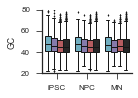

In [16]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.boxplot(x='phenotype', hue='modality', y='GC', 
            data=modalities_gc_df, hue_order=modality_order, palette=modality_palette, 
            order=study.phenotype_order, linewidth=1, fliersize=2)
ax.locator_params('y', nbins=4)
ax.legend_.set_visible(False)
sns.despine()
ax.set(xlabel='')
fig.tight_layout()
fig.savefig('{}/gc_content_boxplot.pdf'.format(figure_folder))

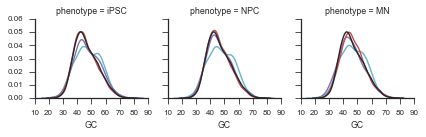

In [17]:
g = sns.FacetGrid(col='phenotype', hue='modality', size=2,
            data=modalities_gc_df, hue_order=modality_order, palette=modality_palette, 
            col_order=study.phenotype_order)

g.map(sns.distplot, 'GC', hist=False)

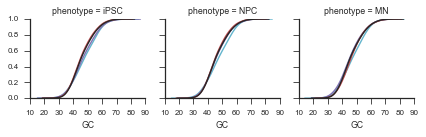

In [18]:
g = sns.FacetGrid(col='phenotype', hue='modality', size=2,
            data=modalities_gc_df, hue_order=modality_order, palette=modality_palette, 
            col_order=study.phenotype_order)

g.map(sns.distplot, 'GC', kde_kws=dict(cumulative=True), hist=False)

### Statistical enrichment - Kruskal-Wallis vs constitutive

In [89]:
from scipy.stats.mstats import kruskalwallis

col = 'GC'

lines = []

for phenotype, phenotype_df in modalities_gc_df.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
        six.print_('\t', modality)

        result = kruskalwallis(modality_df[col], constitutive[col])
        six.print_('\t\t', result)
        lines.append([phenotype, modality, result[0], result[1]])
gc_significance = pd.DataFrame(lines, columns=['phenotype', 'modality', 'statistic', 'p-value'])
gc_significance['q-value'] = gc_significance['p-value'] * gc_significance.shape[0]
gc_significance.loc[gc_significance['q-value'] < 1e-3]

MN
	 ambivalent
		 KruskalResult(statistic=2.8522539119382033, pvalue=0.091245932475313055)
	 bimodal
		 KruskalResult(statistic=1.4643687310790483, pvalue=0.22623628713815269)
	 excluded
		 KruskalResult(statistic=6.4916669262361877, pvalue=0.010838130347381384)
	 included
		 KruskalResult(statistic=3.0908617652238384, pvalue=0.078733100947256676)
NPC
	 ambivalent
		 KruskalResult(statistic=0.078059257665701542, pvalue=0.77994487770426413)
	 bimodal
		 KruskalResult(statistic=0.10721459207565652, pvalue=0.74333784380372259)
	 excluded
		 KruskalResult(statistic=19.777986565135542, pvalue=8.6978685416031267e-06)
	 included
		 KruskalResult(statistic=2.7642032014634865, pvalue=0.096394673148226237)
iPSC
	 ambivalent
		 KruskalResult(statistic=0.45049691059421282, pvalue=0.50209907387177721)
	 bimodal
		 KruskalResult(statistic=11.122140171430983, pvalue=0.00085303300542226583)
	 concurrent
		 KruskalResult(statistic=1.2667862442877367, pvalue=0.26037044517079522)
	 excluded
		 KruskalRe

,phenotype,modality,statistic,p-value,q-value
6,NPC,excluded,19.777987,8.697869e-06,1.130723e-04
11,iPSC,excluded,37.354641,9.848623e-10,1.280321e-08


## Exon conservation
Use `bigWigAverageOverBed`

In [20]:
! bigWigAverageOverBed

bigWigAverageOverBed - Compute average score of big wig over each bed, which may have introns.
usage:
   bigWigAverageOverBed in.bw in.bed out.tab
The output columns are:
   name - name field from bed, which should be unique
   size - size of bed (sum of exon sizes
   covered - # bases within exons covered by bigWig
   sum - sum of values over all bases covered
   mean0 - average over bases with non-covered bases counting as zeroes
   mean - average over just covered bases
Options:
   -bedOut=out.bed - Make output bed that is echo of input bed but with mean column appended
   -sampleAroundCenter=N - Take sample at region N bases wide centered around bed item, rather
                     than the usual sample in the bed item.



In [21]:
txt = 'phastcons_placental_mammal.txt'
! head $constitutive_feature_folder/$txt

exon:chr1:10002682-10002840:-	158	158	17.289	0.109424	0.109424
exon:chr1:104070317-104070364:+	47	47	46.991	0.999809	0.999809
exon:chr1:104076361-104076479:+	118	118	91.811	0.778059	0.778059
exon:chr1:10464218-10464336:+	118	118	94.521	0.801025	0.801025
exon:chr1:10468128-10468197:+	69	69	54.443	0.789029	0.789029
exon:chr1:10471475-10471609:+	134	134	106.817	0.797142	0.797142
exon:chr1:10473119-10473308:+	189	189	156.75	0.829365	0.829365
exon:chr1:10477044-10477174:+	130	130	97.078	0.746754	0.746754
exon:chr1:10477433-10477566:+	133	133	124.756	0.938015	0.938015
exon:chr1:10478883-10478982:+	99	99	86.846	0.877232	0.877232


In [22]:
columns = ['event_id', 'size', 'covered', 'sum', 'mean0', 'mean']

In [23]:
constitutive_conservation = pd.read_table('{}/{}'.format(constitutive_feature_folder, txt), header=None, names=columns,
                                         index_col=0)
six.print_(constitutive_conservation.shape)
constitutive_conservation.head()

(5893, 5)


,size,covered,sum,mean0,mean
event_id,,,,,
exon:chr1:10002682-10002840:-,158,158,17.289,0.109424,0.109424
exon:chr1:104070317-104070364:+,47,47,46.991,0.999809,0.999809
exon:chr1:104076361-104076479:+,118,118,91.811,0.778059,0.778059
exon:chr1:10464218-10464336:+,118,118,94.521,0.801025,0.801025
exon:chr1:10468128-10468197:+,69,69,54.443,0.789029,0.789029


In [24]:
alternative_conservation = pd.read_table('{}/{}'.format(alternative_feature_folder, txt), header=None, names=columns,
                                         index_col=0)
six.print_(alternative_conservation.shape)
alternative_conservation.head()

(26379, 5)


,size,covered,sum,mean0,mean
event_id,,,,,
exon:chr1:100316591-100316680:+@exon:chr1:100318117-100318259:+@exon:chr1:100327059-100327269:+,142,142,1.270,0.008944,0.008944
exon:chr1:100376268-100376403:+@exon:chr1:100377961-100378073:+@exon:chr1:100379083-100379294:+,112,112,102.294,0.913339,0.913339
exon:chr1:100435535-100435718:+@exon:chr1:100440527-100440625:+@exon:chr1:100459093-100459297:+,98,98,2.720,0.027755,0.027755
exon:chr1:100515465-100515560:+@exon:chr1:100524222-100524284:+@exon:chr1:100525434-100525561:+,62,62,61.983,0.999726,0.999726
exon:chr1:100533533-100533751:+@exon:chr1:100534029-100534142:+@exon:chr1:100535170-100535241:+,113,113,107.617,0.952363,0.952363


In [25]:
def make_phenotype_modality_format(constitutive_df):
    constitutive_df = constitutive_df.copy().reset_index()
    constitutive_df['modality'] = 'constitutive'
    dfs = []
    for phenotype in study.phenotype_order:
        df = constitutive_df.copy()#.reset_index()
        df['phenotype'] = phenotype
        dfs.append(df)
    df = pd.concat(dfs)
    six.print_(df.shape)
#     df.head()
    return df

In [26]:
constitutive_conservation.head()

,size,covered,sum,mean0,mean
event_id,,,,,
exon:chr1:10002682-10002840:-,158,158,17.289,0.109424,0.109424
exon:chr1:104070317-104070364:+,47,47,46.991,0.999809,0.999809
exon:chr1:104076361-104076479:+,118,118,91.811,0.778059,0.778059
exon:chr1:10464218-10464336:+,118,118,94.521,0.801025,0.801025
exon:chr1:10468128-10468197:+,69,69,54.443,0.789029,0.789029


In [27]:
constitutive_df_modality = make_phenotype_modality_format(constitutive_conservation)
constitutive_df_modality.head()

(17679, 8)


,event_id,size,covered,sum,mean0,mean,modality,phenotype
0,exon:chr1:10002682-10002840:-,158,158,17.289,0.109424,0.109424,constitutive,iPSC
1,exon:chr1:104070317-104070364:+,47,47,46.991,0.999809,0.999809,constitutive,iPSC
2,exon:chr1:104076361-104076479:+,118,118,91.811,0.778059,0.778059,constitutive,iPSC
3,exon:chr1:10464218-10464336:+,118,118,94.521,0.801025,0.801025,constitutive,iPSC
4,exon:chr1:10468128-10468197:+,69,69,54.443,0.789029,0.789029,constitutive,iPSC


In [28]:
modalities_conservation = study.supplemental.modalities_tidy.join(alternative_conservation, on='event_id')
modalities_conservation.head()

,phenotype,event_id,modality,size,covered,sum,mean0,mean
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,232,232,162.071,0.698582,0.698582
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,155,155,124.061,0.800394,0.800394
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,bimodal,72,72,1.192,0.016556,0.016556
3,MN,exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,bimodal,158,158,154.786,0.979658,0.979658
4,MN,exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563504-103563776:-,included,98,98,97.968,0.999673,0.999673


In [29]:
modalities_conservation_constitutive = pd.concat([modalities_conservation, constitutive_df_modality])
modalities_conservation_constitutive.head()

,covered,event_id,mean,mean0,modality,phenotype,size,sum
0,232,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,0.698582,0.698582,included,MN,232,162.071
1,155,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,0.800394,0.800394,included,MN,155,124.061
2,72,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,0.016556,0.016556,bimodal,MN,72,1.192
3,158,exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,0.979658,0.979658,bimodal,MN,158,154.786
4,98,exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563504-103563776:-,0.999673,0.999673,included,MN,98,97.968


In [30]:
from flotilla.visualize.generic import cdfplot

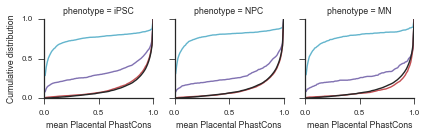

In [31]:
g = sns.FacetGrid(col='phenotype', hue='modality', size=2, #aspect=.75,
            data=modalities_conservation_constitutive, hue_order=modality_order, palette=modality_palette, 
            col_order=study.phenotype_order)

g.map(cdfplot, 'mean')
g.set_xlabels('mean Placental PhastCons')
g.set_ylabels('Cumulative distribution')
g.set(xlim=(0, 1), ylim=(0, 1), yticks=(0, 0.5, 1), xticks=(0, 0.5, 1))
g.fig.tight_layout()
g.savefig('{}/conservation_cdf.pdf'.format(figure_folder))

### Statistical enrichment - pairwise Kruskal-Wallis test vs constitutive

In [90]:
from scipy.stats.mstats import kruskalwallis

col = 'mean'

lines = []

for phenotype, phenotype_df in modalities_conservation_constitutive.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
        six.print_('\t', modality)

        result = kruskalwallis(modality_df[col], constitutive[col])
        six.print_('\t\t', result)
        lines.append([phenotype, modality, result[0], result[1]])
exon_conservation_significance = pd.DataFrame(lines, columns=['phenotype', 'modality', 'statistic', 'p-value'])
exon_conservation_significance['q-value'] = exon_conservation_significance['p-value'] * exon_conservation_significance.shape[0]
exon_conservation_significance.loc[exon_conservation_significance['q-value'] < 1e-3]

MN
	 ambivalent
		 KruskalResult(statistic=0.98366843259143111, pvalue=0.32129480433021806)
	 bimodal
		 KruskalResult(statistic=4.2247273615473429, pvalue=0.039839019146872379)
	 excluded
		 KruskalResult(statistic=830.26622947508099, pvalue=1.4183678415605403e-182)
	 included
		 KruskalResult(statistic=23.867700990149505, pvalue=1.0318864170095507e-06)
NPC
	 ambivalent
		 KruskalResult(statistic=0.71710338450416578, pvalue=0.39709569831130298)
	 bimodal
		 KruskalResult(statistic=52.686365199845802, pvalue=3.9129820132516654e-13)
	 excluded
		 KruskalResult(statistic=1488.2124548353927, pvalue=0.0)
	 included
		 KruskalResult(statistic=5.2958232303961639, pvalue=0.021376624532514099)
iPSC
	 ambivalent
		 KruskalResult(statistic=0.38618321278430551, pvalue=0.53431252138589824)
	 bimodal
		 KruskalResult(statistic=176.93243356506267, pvalue=2.2658216749118612e-40)
	 concurrent
		 KruskalResult(statistic=2.4276195539526357, pvalue=0.11921380837434431)
	 excluded
		 KruskalResult(statist

,phenotype,modality,statistic,p-value,q-value
2,MN,excluded,830.266229,1.418368e-182,1.843878e-181
3,MN,included,23.867701,1.031886e-06,1.341452e-05
5,NPC,bimodal,52.686365,3.912982e-13,5.086877e-12
6,NPC,excluded,1488.212455,0.000000e+00,0.000000e+00
9,iPSC,bimodal,176.932434,2.265822e-40,2.945568e-39
11,iPSC,excluded,1817.379585,0.000000e+00,0.000000e+00


## Overlap with repetitive elements

e.g. SINE, LINE, ALU

In [33]:
prefix = 'repetitive_element_overlap'
csv = '{}.csv'.format(prefix)

In [34]:
constitutive_repetitive = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), index_col=0)
six.print_(constitutive_repetitive.shape)
constitutive_repetitive.head()

(15, 4)


,repetitive_element_dfam_class,repetitive_element_dfam_id,repetitive_element_dfam_superfamily,repetitive_element_dfam_type
event_id,,,,
exon:chr10:17277168-17278378:+,SINE,MIRb,MIR,Retrotransposon
exon:chr11:57094177-57094988:-,Cut,Charlie16a,hAT-Charlie,DNA
exon:chr11:57095771-57097612:-,"snoRNA,SINE,LTR","U13,MLT1K,MIRc","ERVL-MaLR,MIR,U14","ncRNA,Retrotransposon"
exon:chr14:24614588-24615449:-,SINE,MIR3,MIR,Retrotransposon
exon:chr14:94521342-94524243:-,"LTR,Cut,SINE","MIR,MER117,MER21B","MIR,ERVL,hAT-Charlie","Retrotransposon,DNA"


In [35]:
constitutive_repetitive_modalities = make_phenotype_modality_format(constitutive_repetitive)
print(constitutive_repetitive_modalities.shape)
constitutive_repetitive_modalities.head()

(45, 7)
(45, 7)


,event_id,repetitive_element_dfam_class,repetitive_element_dfam_id,repetitive_element_dfam_superfamily,repetitive_element_dfam_type,modality,phenotype
0,exon:chr10:17277168-17278378:+,SINE,MIRb,MIR,Retrotransposon,constitutive,iPSC
1,exon:chr11:57094177-57094988:-,Cut,Charlie16a,hAT-Charlie,DNA,constitutive,iPSC
2,exon:chr11:57095771-57097612:-,"snoRNA,SINE,LTR","U13,MLT1K,MIRc","ERVL-MaLR,MIR,U14","ncRNA,Retrotransposon",constitutive,iPSC
3,exon:chr14:24614588-24615449:-,SINE,MIR3,MIR,Retrotransposon,constitutive,iPSC
4,exon:chr14:94521342-94524243:-,"LTR,Cut,SINE","MIR,MER117,MER21B","MIR,ERVL,hAT-Charlie","Retrotransposon,DNA",constitutive,iPSC


In [36]:
alternative_repetitive = pd.read_csv('{}/{}'.format(alternative_feature_folder, csv), index_col=0)
six.print_(alternative_repetitive.shape)
alternative_repetitive.head()

(4549, 4)


,repetitive_element_dfam_class,repetitive_element_dfam_id,repetitive_element_dfam_superfamily,repetitive_element_dfam_type
event_id,,,,
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,Cut,MER91C,hAT-Tip100,DNA
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369425:+,Cut,MER91C,hAT-Tip100,DNA
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368624-103368659:+,Cut,MER91C,hAT-Tip100,DNA
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368624-103368694:+@exon:chr10:103369124-103369425:+,Cut,MER91C,hAT-Tip100,DNA
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368624-103368801:+@exon:chr10:103369124-103369425:+,Cut,MER91C,hAT-Tip100,DNA


In [37]:
modalities_repetitive = study.supplemental.modalities_tidy.join(alternative_repetitive, on='event_id')
modalities_repetitive = pd.concat([modalities_repetitive, constitutive_repetitive_modalities.rename(columns={'event_id': 'event_id'})])
six.print_(modalities_repetitive.shape)
modalities_repetitive.head()

(14898, 7)


,event_id,modality,phenotype,repetitive_element_dfam_class,repetitive_element_dfam_id,repetitive_element_dfam_superfamily,repetitive_element_dfam_type
0,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,MN,NaN,NaN,NaN,NaN
1,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,MN,NaN,NaN,NaN,NaN
2,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,bimodal,MN,Cut,MER91C,hAT-Tip100,DNA
3,exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,bimodal,MN,NaN,NaN,NaN,NaN
4,exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563504-103563776:-,included,MN,NaN,NaN,NaN,NaN


In [38]:
modalities_repetitive.groupby('repetitive_element_dfam_superfamily').size()

repetitive_element_dfam_superfamily
5S-derived,MIR                      1
7SK,Alu                             2
Alu                               770
Alu,ERV1                            4
Alu,ERVK,ERV1                       1
Alu,Undefined                       1
Alu,hAT-Charlie                    12
CR1                                32
ERV1                               29
ERVK                                2
ERVL                               15
ERVL-MaLR                          55
ERVL-MaLR,Alu                       2
ERVL-MaLR,MIR                       2
ERVL-MaLR,MIR,Alu                   2
ERVL-MaLR,MIR,U14                   3
ERVL-MaLR,hAT-Charlie               2
ERVL?                               1
Gypsy?                              3
Helitron                            4
L1                                 18
L2                                 14
L2,hAT-Charlie                      2
MIR                               254
MIR,Alu                            15
MIR,CR1       

### Make new rows for when we see commas in the superfamily

In [39]:
s = modalities_repetitive.set_index(['phenotype', 'modality', 'event_id'])['repetitive_element_dfam_superfamily'].dropna()
# s = s.map(lambda x: x.split(','))
s.tail(20)

phenotype  modality      event_id                       
NPC        constitutive  exon:chr5:137892463-137893185:-                     Alu
                         exon:chr6:31500557-31503262:-                       Alu
                         exon:chr7:134132050-134132813:-                     MIR
                         exon:chr8:20070293-20074835:+       MIR,hAT-Charlie,Alu
                         exon:chrX:51640891-51643392:+                   MIR,Alu
MN         constitutive  exon:chr10:17277168-17278378:+                      MIR
                         exon:chr11:57094177-57094988:-              hAT-Charlie
                         exon:chr11:57095771-57097612:-        ERVL-MaLR,MIR,U14
                         exon:chr14:24614588-24615449:-                      MIR
                         exon:chr14:94521342-94524243:-     MIR,ERVL,hAT-Charlie
                         exon:chr18:71922976-71928179:-                      Alu
                         exon:chr19:1388832-1391049:

In [40]:
s = pd.concat([pd.Series(x.split(','), index=[i]*len(x.split(','))) for i, x in s.iteritems()])
s.tail(20)

(MN, constitutive, exon:chr11:57095771-57097612:-)             MIR
(MN, constitutive, exon:chr11:57095771-57097612:-)             U14
(MN, constitutive, exon:chr14:24614588-24615449:-)             MIR
(MN, constitutive, exon:chr14:94521342-94524243:-)             MIR
(MN, constitutive, exon:chr14:94521342-94524243:-)            ERVL
(MN, constitutive, exon:chr14:94521342-94524243:-)     hAT-Charlie
(MN, constitutive, exon:chr18:71922976-71928179:-)             Alu
(MN, constitutive, exon:chr19:1388832-1391049:+)               Alu
(MN, constitutive, exon:chr19:1388832-1391049:+)       hAT-Charlie
(MN, constitutive, exon:chr1:241667342-241667545:-)            MIR
(MN, constitutive, exon:chr1:40207567-40208969:+)              Alu
(MN, constitutive, exon:chr3:58416384-58417520:-)              Alu
(MN, constitutive, exon:chr5:137892463-137893185:-)            Alu
(MN, constitutive, exon:chr6:31500557-31503262:-)              Alu
(MN, constitutive, exon:chr7:134132050-134132813:-)           

In [41]:
s.index = pd.MultiIndex.from_tuples(s.index)
s.tail(20)

MN  constitutive  exon:chr11:57095771-57097612:-             MIR
                  exon:chr11:57095771-57097612:-             U14
                  exon:chr14:24614588-24615449:-             MIR
                  exon:chr14:94521342-94524243:-             MIR
                  exon:chr14:94521342-94524243:-            ERVL
                  exon:chr14:94521342-94524243:-     hAT-Charlie
                  exon:chr18:71922976-71928179:-             Alu
                  exon:chr19:1388832-1391049:+               Alu
                  exon:chr19:1388832-1391049:+       hAT-Charlie
                  exon:chr1:241667342-241667545:-            MIR
                  exon:chr1:40207567-40208969:+              Alu
                  exon:chr3:58416384-58417520:-              Alu
                  exon:chr5:137892463-137893185:-            Alu
                  exon:chr6:31500557-31503262:-              Alu
                  exon:chr7:134132050-134132813:-            MIR
                  exon:ch

In [42]:
modalities_repetitive_no_commas = s.reset_index()
modalities_repetitive_no_commas = modalities_repetitive_no_commas.rename(
    columns={'level_0': 'phenotype', 'level_1': 'modality', 'level_2':'event_id', 0:'repetitive_element_dfam_superfamily'})
modalities_repetitive_no_commas.head()

,phenotype,modality,event_id,repetitive_element_dfam_superfamily
0,MN,bimodal,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,hAT-Tip100
1,MN,excluded,exon:chr10:112679305-112679415:+@exon:chr10:112711366-112711550:+@exon:chr10:112723883-112724819:+,Alu
2,MN,excluded,exon:chr10:126107442-126107505:-@exon:chr10:126102915-126103001:-@exon:chr10:126100542-126100769:-,hAT-Charlie
3,MN,excluded,exon:chr10:27815757-27815818:+@exon:chr10:27820458-27820544:+@exon:chr10:27821436-27821508:+,hAT-Charlie
4,MN,excluded,exon:chr10:76973779-76973828:+@exon:chr10:76977646-76977749:+@exon:chr10:76978821-76978973:+,Alu


In [43]:
col = 'repetitive_element_dfam_superfamily'
modalities_repetitive_counts = modalities_repetitive_no_commas.groupby(['phenotype', 'modality', col])['event_id'].count()
modalities_repetitive_counts = modalities_repetitive_counts.reset_index()
modalities_repetitive_counts = modalities_repetitive_counts.rename(columns={'event_id':'# AS Exons'})
modalities_repetitive_counts.head()

,phenotype,modality,repetitive_element_dfam_superfamily,# AS Exons
0,MN,bimodal,Alu,14
1,MN,bimodal,ERVL-MaLR,3
2,MN,bimodal,Gypsy?,1
3,MN,bimodal,L2,1
4,MN,bimodal,MIR,8


In [44]:
modalities_repetitive_counts['% AS Exons'] = 100 * modalities_repetitive_counts.groupby(
    ['phenotype', 'modality'])['# AS Exons'].apply(lambda x: x/x.sum())
modalities_repetitive_counts.head()

,phenotype,modality,repetitive_element_dfam_superfamily,# AS Exons,% AS Exons
0,MN,bimodal,Alu,14,40.000000
1,MN,bimodal,ERVL-MaLR,3,8.571429
2,MN,bimodal,Gypsy?,1,2.857143
3,MN,bimodal,L2,1,2.857143
4,MN,bimodal,MIR,8,22.857143


### This gets the mean number of repetitive elements per exon per category .. not quite what we want

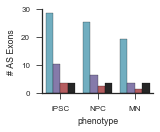

In [45]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.barplot(x='phenotype', hue='modality', y='# AS Exons',
               data=modalities_repetitive_counts, hue_order=modality_order, 
               palette=modality_palette, order=study.phenotype_order, ci=None)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='# AS Exons')
sns.despine()

In [46]:
modalities_repetitive_counts_at_least_one = modalities_repetitive_counts.loc[modalities_repetitive_counts['# AS Exons'] > 1]
six.print_('modalities_repetitive_counts.shape', modalities_repetitive_counts.shape)
six.print_('modalities_repetitive_counts_at_least_one.shape', modalities_repetitive_counts_at_least_one.shape)
modalities_repetitive_counts_at_least_one.head()

modalities_repetitive_counts.shape (124, 5)
modalities_repetitive_counts_at_least_one.shape (80, 5)


,phenotype,modality,repetitive_element_dfam_superfamily,# AS Exons,% AS Exons
0,MN,bimodal,Alu,14,40.000000
1,MN,bimodal,ERVL-MaLR,3,8.571429
4,MN,bimodal,MIR,8,22.857143
5,MN,bimodal,TcMar-Tigger,2,5.714286
7,MN,bimodal,hAT-Charlie,3,8.571429


In [47]:
modalities_repetitive_counts.groupby('# AS Exons').size()

# AS Exons
1      44
2      14
3      12
4       8
5       4
6       9
7       3
8       8
9       1
10      1
12      2
14      1
15      2
16      1
17      1
24      3
33      1
34      1
36      1
42      1
53      1
62      1
90      1
124     1
232     1
320     1
dtype: int64

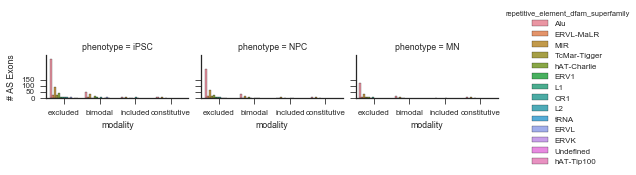

In [48]:
# fig, ax = plt.subplots(figsize=(2, 1.5))
g = sns.factorplot(x='modality', hue='repetitive_element_dfam_superfamily', y='# AS Exons',
               data=modalities_repetitive_counts_at_least_one, order=modality_order, 
#                palette=modality_palette, 
            col='phenotype', kind='bar', size=1.5, aspect=1.6,
            col_order=study.phenotype_order, ci=None)
# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# ax.set(ylabel='# AS Exons')
g.set(yticks=(0, 50, 100, 150))
sns.despine()
g.savefig('{}/repetitive_element_superfamily_per_modality_at_least_one.pdf'.format(figure_folder))

### Get total number of exons with repetitive elements

In [49]:
modalities_repetitive_no_commas.head()

,phenotype,modality,event_id,repetitive_element_dfam_superfamily
0,MN,bimodal,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,hAT-Tip100
1,MN,excluded,exon:chr10:112679305-112679415:+@exon:chr10:112711366-112711550:+@exon:chr10:112723883-112724819:+,Alu
2,MN,excluded,exon:chr10:126107442-126107505:-@exon:chr10:126102915-126103001:-@exon:chr10:126100542-126100769:-,hAT-Charlie
3,MN,excluded,exon:chr10:27815757-27815818:+@exon:chr10:27820458-27820544:+@exon:chr10:27821436-27821508:+,hAT-Charlie
4,MN,excluded,exon:chr10:76973779-76973828:+@exon:chr10:76977646-76977749:+@exon:chr10:76978821-76978973:+,Alu


In [50]:
modalities_repetitive_counts_total = modalities_repetitive_no_commas.groupby(
    ['phenotype', 'modality'])['event_id'].apply(lambda x: len(x.unique()))
modalities_repetitive_counts_total = modalities_repetitive_counts_total.reset_index()
modalities_repetitive_counts_total = modalities_repetitive_counts_total.rename(columns={'event_id': '# AS Exons'})
modalities_repetitive_counts_total.head()

,phenotype,modality,# AS Exons
0,MN,bimodal,31
1,MN,constitutive,15
2,MN,excluded,192
3,MN,included,10
4,NPC,bimodal,72


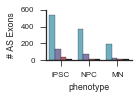

In [51]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.barplot(x='phenotype', hue='modality', y='# AS Exons',
               data=modalities_repetitive_counts_total, hue_order=modality_order, 
               palette=modality_palette, order=study.phenotype_order, ci=None)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='# AS Exons')
sns.despine()
fig.tight_layout()
fig.savefig('{}/repetitive_element_n_exons_with_repetitive_elements_per_modality.pdf'.format(figure_folder))

### Statistical Enrichment - hypergeometric test vs all exons in that modality

In [75]:
from scipy.stats import hypergeom

col = 'repetitive_element_dfam_superfamily'

lines = []

for phenotype, phenotype_df in modalities_repetitive.groupby(['phenotype']):
#     six.print_(phenotype)
    M = phenotype_df.shape[0]
    n = phenotype_df[col].count()
    for modality, modality_df in phenotype_df.groupby('modality'):
#         six.print_('\t', modality)
        N = modality_df.shape[0]
        x = modality_df[col].count()
        result = hypergeom.sf(x, M, n, N)
#         six.print_('\t\t', result)
        lines.append([phenotype, modality, result])
repetitive_element_significance = pd.DataFrame(lines, columns=['phenotype', 'modality', 'p-value'])
repetitive_element_significance['q-value'] = repetitive_element_significance['p-value'] * repetitive_element_significance.shape[0]
repetitive_element_significance.loc[repetitive_element_significance['q-value'] < 1e-3]

,phenotype,modality,p-value,q-value
2,MN,constitutive,0.000000e+00,0.000000e+00
3,MN,excluded,8.746071e-90,1.399371e-88
7,NPC,constitutive,0.000000e+00,0.000000e+00
8,NPC,excluded,2.310004e-177,3.696007e-176
13,iPSC,constitutive,0.000000e+00,0.000000e+00
14,iPSC,excluded,1.021928e-242,1.635084e-241


In [76]:
from scipy.stats import fisher_exact

In [79]:
fisher_exact([[x, N-x], [n-x, M-n-N]])

(0.023636852001074401, 8.673787401248143e-254)

## Ancient alternative splicing

In [81]:
prefix = 'exon2_merkin2012_ancient'
csv = '{}.csv'.format(prefix)

In [82]:
col = 'Ancient Alt Splicing'

In [83]:
alternative_merkin2012 = pd.read_csv('{}/{}'.format(alternative_feature_folder, csv), index_col=0, squeeze=True, header=None)
six.print_(alternative_merkin2012.shape)
alternative_merkin2012.name = col
alternative_merkin2012.head()

(46193,)


0
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-    False
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-    False
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-    False
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-    False
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+    False
Name: Ancient Alt Splicing, dtype: bool

No constitutive exons overlapped with any of the ancient Merkin2012 exons so we're ignoring constitutive for now.

In [84]:
modalities_merkin2012 = study.supplemental.modalities_tidy.join(alternative_merkin2012, on='event_id')
six.print_(modalities_merkin2012.shape)
modalities_merkin2012.head()

(14853, 4)


,phenotype,event_id,modality,Ancient Alt Splicing
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,False
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,False
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,bimodal,False
3,MN,exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,bimodal,False
4,MN,exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563504-103563776:-,included,False


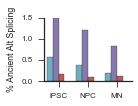

In [85]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.barplot(x='phenotype', y=col, hue='modality', hue_order=modality_order, 
            data=modalities_merkin2012, ci=None,
            palette=modality_palette, order=study.phenotype_order)
ax.locator_params('y', nbins=3)

yticks = ax.get_yticks()
yticklabels = 100 * yticks
ax.set(xlabel='', ylabel='% ' +col, yticklabels=yticklabels)
ax.legend_.set_visible(False)
sns.despine()
fig.tight_layout()
fig.savefig('{}/{}.pdf'.format(figure_folder, prefix))

### Statistical Enrichment - hypergeometric test vs all exons in that modality

In [87]:
from scipy.stats import hypergeom

lines = []

for phenotype, phenotype_df in modalities_merkin2012.groupby(['phenotype']):
#     six.print_(phenotype)
    M = phenotype_df[col].count()
    n = phenotype_df[col].sum()
    for modality, modality_df in phenotype_df.groupby('modality'):
#         six.print_('\t', modality)
        N = modality_df[col].count()
        x = modality_df[col].sum()
        result = hypergeom.sf(x, M, n, N)
#         six.print_('\t\t', result)
        lines.append([phenotype, modality, result])
ancient_splicing_significance = pd.DataFrame(lines, columns=['phenotype', 'modality', 'p-value'])
ancient_splicing_significance['q-value'] = ancient_splicing_significance['p-value'] * ancient_splicing_significance.shape[0]
ancient_splicing_significance.loc[ancient_splicing_significance['q-value'] < 1e-3]

,phenotype,modality,p-value,q-value
5,NPC,bimodal,2.545329e-05,0.000331
9,iPSC,bimodal,3.715583e-07,0.000005


## Basewise intron conservation

## Gene age (phylostratum from Domazet-Loso MBE 2012)

In [60]:
study.expression.feature_data.head()

,biomark_neural_panel,confident_rbp,gencode_id,gene_name,gene_status,gene_type,havana_gene,level,rbp,ribosomal,...,gerstberger2014_rbp_target_diverse,gerstberger2014_rbp_family_targets,cell_surface_markers,gerstberger2014_tf,cell_cycle,domazetloso2008_phylostratum,bioguo_animaltfdb_tf,bioguo_animaltfdb_chromatin_remodeler,bioguo_animaltfdb_cofactor,max_exons_per_gene
ENSG00000000003,False,False,ENSG00000000003.10,TSPAN6,KNOWN,protein_coding,OTTHUMG00000022002.1,2,False,False,...,False,NaN,False,False,False,2,False,False,False,8
ENSG00000000005,False,False,ENSG00000000005.5,TNMD,KNOWN,protein_coding,OTTHUMG00000022001.1,2,False,False,...,False,NaN,False,False,False,11,False,False,False,7
ENSG00000000419,False,False,ENSG00000000419.8,DPM1,KNOWN,protein_coding,OTTHUMG00000032742.2,2,False,False,...,False,NaN,False,False,False,1,False,False,False,10
ENSG00000000457,False,False,ENSG00000000457.9,SCYL3,KNOWN,protein_coding,OTTHUMG00000035941.4,2,False,False,...,False,NaN,False,False,False,2,False,False,False,14
ENSG00000000460,False,False,ENSG00000000460.12,C1orf112,KNOWN,protein_coding,OTTHUMG00000035821.6,2,False,False,...,False,NaN,False,False,True,6,False,False,False,29


In [61]:
genes_with_constitutive_exons = pd.read_csv('{}/genes.csv'.format(constitutive_feature_folder), 
                                            index_col=0, header=None, squeeze=True)
six.print_(genes_with_constitutive_exons.shape)
genes_with_constitutive_exons.head()

(6250,)


0
exon:chr10:102039881-102039985:-                                    ENSG00000196072
exon:chr10:102040691-102040810:-                                    ENSG00000196072
exon:chr10:102045854-102045970:-                                    ENSG00000196072
exon:chr10:102045854-102046089:-                                    ENSG00000196072
exon:chr10:102286732-102286831:-    ENSG00000075826,ENSG00000166136,ENSG00000255339
Name: 1, dtype: object

In [62]:
genes_with_constitutive_exons_expanded = pd.concat([pd.Series(x.split(','), index=[i]*len(x.split(',')))
    for i, x in genes_with_constitutive_exons.iteritems()])
genes_with_constitutive_exons_expanded.head()

exon:chr10:102039881-102039985:-    ENSG00000196072
exon:chr10:102040691-102040810:-    ENSG00000196072
exon:chr10:102045854-102045970:-    ENSG00000196072
exon:chr10:102045854-102046089:-    ENSG00000196072
exon:chr10:102286732-102286831:-    ENSG00000075826
dtype: object

In [63]:
genes_with_constitutive_exons_expanded.name = 'ensembl_id'
genes_with_constitutive_exons_expanded.index.name = 'event_id'
genes_with_constitutive_exons_expanded.head()

event_id
exon:chr10:102039881-102039985:-    ENSG00000196072
exon:chr10:102040691-102040810:-    ENSG00000196072
exon:chr10:102045854-102045970:-    ENSG00000196072
exon:chr10:102045854-102046089:-    ENSG00000196072
exon:chr10:102286732-102286831:-    ENSG00000075826
Name: ensembl_id, dtype: object

In [64]:
genes_with_constitutive_exons_expanded.to_csv('{}/genes_expanded.csv'.format(constitutive_feature_folder))

In [65]:
constitutive_genes_modalities = make_phenotype_modality_format(genes_with_constitutive_exons_expanded)
constitutive_genes_modalities.head()

(19398, 4)


,event_id,ensembl_id,modality,phenotype
0,exon:chr10:102039881-102039985:-,ENSG00000196072,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,ENSG00000196072,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,ENSG00000196072,constitutive,iPSC
3,exon:chr10:102045854-102046089:-,ENSG00000196072,constitutive,iPSC
4,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC


In [66]:
event_id_to_genes = pd.concat([pd.Series(x.split(','), index=[i]*len(x.split(',')))
    for i, x in study.splicing.feature_data['one_ensembl_id'].iteritems() if isinstance(x, str)])
event_id_to_genes

exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-                         ENSG00000107521
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-                         ENSG00000107521
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-                         ENSG00000107521
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-                         ENSG00000120053
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+                         ENSG00000198018
exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+                         ENSG00000198018
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-                         ENSG00000014919
exon:chr10:101507014-101507

In [67]:
event_id_to_genes.head()
event_id_to_genes.name = 'ensembl_id'

### Add constitutive exons and their genes

In [91]:
event_id_to_genes.to_csv('{}/genes_expanded.csv'.format(alternative_feature_folder))

In [92]:
modalities_genes = study.supplemental.modalities_tidy.join(event_id_to_genes, on='event_id')
modalities_genes = pd.concat([modalities_genes, constitutive_genes_modalities])
modalities_genes.head()

,ensembl_id,event_id,modality,phenotype
0,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,MN
1,ENSG00000255339,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,MN
2,ENSG00000166171,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,bimodal,MN
3,ENSG00000198408,exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,bimodal,MN
4,ENSG00000198408,exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563504-103563776:-,included,MN


Add phylostratum

In [93]:
col = 'domazetloso2008_phylostratum'
modalities_genes = modalities_genes.join(study.expression.feature_data[col], on='ensembl_id')
modalities_genes.head()

,ensembl_id,event_id,modality,phenotype,domazetloso2008_phylostratum
0,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,MN,1
1,ENSG00000255339,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,MN,NaN
2,ENSG00000166171,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,bimodal,MN,2
3,ENSG00000198408,exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,bimodal,MN,1
4,ENSG00000198408,exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563504-103563776:-,included,MN,1


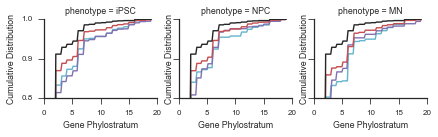

In [94]:
g = sns.FacetGrid(modalities_genes, **facet_kws)
g.map(cdfplot, col)
g.set(ylim=(0.8, 1), yticks=(0.8, 0.9, 1), ylabel='Cumulative Distribution', xlabel='Gene Phylostratum')
g.savefig('{}/{}_cdf.pdf'.format(figure_folder, col))

### Statistical testing - Kruskal-Wallis test vs constitutive

In [96]:
from scipy.stats.mstats import kruskalwallis
lines = []

for phenotype, phenotype_df in modalities_genes.groupby(['phenotype']):
#     six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
#         six.print_('\t', modality)

        result = kruskalwallis(modality_df[col], constitutive[col])
#         six.print_('\t\t', result)
        lines.append([phenotype, modality, result[0], result[1]])
phylostratum_significance = pd.DataFrame(lines, columns=['phenotype', 'modality', 'statstic', 'p-value'])
phylostratum_significance['q-value'] = phylostratum_significance['p-value'] * phylostratum_significance.shape[0]
phylostratum_significance.loc[phylostratum_significance['q-value'] < 1e-3]

,phenotype,modality,statstic,p-value,q-value
1,MN,bimodal,25.008000,5.709295e-07,7.422083e-06
2,MN,excluded,39.691317,2.974450e-10,3.866785e-09
3,MN,included,17.354036,3.102388e-05,4.033104e-04
5,NPC,bimodal,48.150059,3.948170e-12,5.132621e-11
6,NPC,excluded,36.669551,1.399484e-09,1.819329e-08
7,NPC,included,20.951913,4.709573e-06,6.122445e-05
9,iPSC,bimodal,65.677213,5.311646e-16,6.905140e-15
11,iPSC,excluded,44.502897,2.539811e-11,3.301754e-10
12,iPSC,included,21.280581,3.967303e-06,5.157494e-05
